# EDA

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [46]:
df_org=pd.read_csv('c:/users/gaurav yadav/downloads/bank-full.csv',sep=';')
df=df_org

In [47]:
df.head()
y=df.iloc[:,-1].values


array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [48]:
#df.isna().sum()
#as there is no null values so no need of imputation

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [49]:
#df.columns

In [50]:
def range_x(x):
    return (np.min(x),np.max(x))
for i in range(1,12):
    print(df.columns[i],range_x(df.iloc[:,i]),end=' ')
    print()

job ('admin.', 'unknown') 
marital ('divorced', 'single') 
education ('primary', 'unknown') 
default ('no', 'yes') 
balance (-8019, 102127) 
housing ('no', 'yes') 
loan ('no', 'yes') 
contact ('cellular', 'unknown') 
day (1, 31) 
month ('apr', 'sep') 
duration (0, 4918) 


# converting string in to categories

In [51]:
df.job=df.job.astype('category')

In [52]:
df.marital=df.marital.astype('category')

In [53]:
df.education=df.education.astype('category')
df.housing=df.housing.astype('category')
df.loan=df.loan.astype('category')

In [54]:
df.default=df.default.astype('category')

In [55]:
df.contact=df.contact.astype('category')

In [56]:
df.poutcome=df.poutcome.astype('category')

# encoding categorical data

In [57]:
df=df_org.drop(columns=['y'],axis=1)
df=pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])


# converting dataframe to array

In [58]:
x=df.values


array([[  58, 2143,    5, ...,    0,    0,    1],
       [  44,   29,    5, ...,    0,    0,    1],
       [  33,    2,    5, ...,    0,    0,    1],
       ...,
       [  72, 5715,   17, ...,    0,    1,    0],
       [  57,  668,   17, ...,    0,    0,    1],
       [  37, 2971,   17, ...,    1,    0,    0]], dtype=int64)

In [59]:
#encoding dependent variable y
le=LabelEncoder()
y=le.fit_transform(y)

#applying feature scaling to numerical columns


#splitting data in to test_data and train_data
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.2,random_state=0)
sc_x=StandardScaler()
x_tr=sc_x.fit_transform(x_tr)
x_te=sc_x.transform(x_te)




In [60]:
#building the model 
model=LogisticRegression(random_state=0)

model.fit(x_tr,y_tr)




[0 0 0 ... 1 0 0]


LogisticRegression(random_state=0)

In [61]:
#predicting result for test data
y_pr=model.predict(x_te)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [63]:
#confusion matrix
cm=confusion_matrix(y_te,y_pr)
cm

array([[7753,  227],
       [ 690,  373]], dtype=int64)

In [64]:
accuracy_score(y_te,y_pr)

0.898595598805706

In [65]:
#actual vs predicted values
df1=pd.DataFrame({'y_te':y_te,'y_pr':y_pr})
a=df1['y_te']==1
b=df1['y_pr']==1
df1[a&b]
df1[a]

,y_te,y_pr
1,1,1
26,1,1
30,1,0
37,1,0
41,1,0
...,...,...
9003,1,0
9028,1,0
9033,1,1
9038,1,0


In [66]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_te,y_pr))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



Text(0, 0.5, 'True Positive Rate')

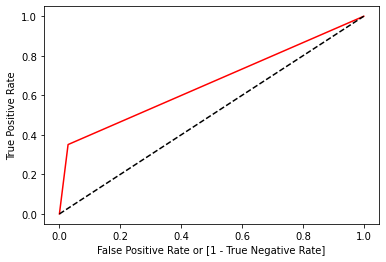

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_te,y_pr)

auc = roc_auc_score(y_te, y_pr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# even though overall accuracy is high but model poorly performs in predicting the true defaulters.                                                                                  it is due to imbalance in data                                                                                                                      

In [79]:
#using over sampling
from imblearn.over_sampling import RandomOverSampler 

y=df_org.iloc[:,-1].values

df1=df_org.drop(['y'],axis=1)

df1=pd.get_dummies(df1)
le=LabelEncoder()
y=le.fit_transform(y)
x=df1.values

ros=RandomOverSampler(random_state=0)
x_new,y_new=ros.fit_resample(x,y)





1    39922
0    39922
dtype: int64

In [70]:
#splitting the data
x_tr,x_te,y_tr,y_te=train_test_split(x_new,y_new,test_size=.2,random_state=0)
#feature scaling
sc_x=StandardScaler()
x_tr=sc_x.fit_transform(x_tr)
x_te=sc_x.transform(x_te)
#training the model
model1=LogisticRegression()
model1.fit(x_tr,y_tr)

LogisticRegression()

In [71]:
#predicting 
y_pr=model1.predict(x_te)
#classification report
print(classification_report(y_te,y_pr))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      7901
           1       0.84      0.83      0.83      8068

    accuracy                           0.83     15969
   macro avg       0.83      0.83      0.83     15969
weighted avg       0.83      0.83      0.83     15969



In [72]:
accuracy_score(y_te,y_pr)

0.8328636733671488

Text(0, 0.5, 'True Positive Rate')

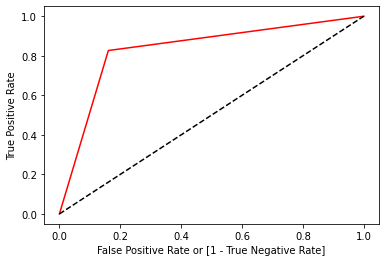

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_te,y_pr)

auc = roc_auc_score(y_te, y_pr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [74]:
cm=confusion_matrix(y_te,y_pr)

In [44]:
cm

array([[6631, 1270],
       [1399, 6669]], dtype=int64)

#                                                                                                                                  Even though accuracy of this model is low as compared to previous model,but it predicts  both the classes with almost same accuracy,                  and it predicts minority class more accurately which is more important than    predicting the majority class more accurately.

# now using SMOTE to increase accuracy

In [80]:
#over sampling using smote
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_new, y_new = smote.fit_resample(x, y)




              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7901
           1       0.97      0.92      0.94      8068

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969



In [82]:
#splitting the data
x_tr,x_te,y_tr,y_te=train_test_split(x_new,y_new,test_size=.2,random_state=0)
#feature scaling
sc_x=StandardScaler()
x_tr=sc_x.fit_transform(x_tr)
x_te=sc_x.transform(x_te)



In [83]:
#training the model
model1=LogisticRegression()
model1.fit(x_tr,y_tr)

#predicting result
#predicting 
y_pr=model1.predict(x_te)
#classification report
print(classification_report(y_te,y_pr))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7901
           1       0.97      0.92      0.94      8068

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969



In [84]:
print(accuracy_score(y_te,y_pr))

0.9428893481119669


Text(0, 0.5, 'True Positive Rate')

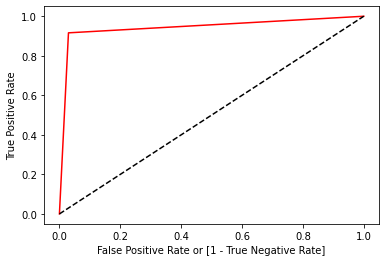

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_te,y_pr)

auc = roc_auc_score(y_te, y_pr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# by using SMOTE both accuracy increased as well as F1-score of predicting true positives,i.e person is subscribed term deposit